


# Tarefa 2

## Modelagem da rela√ß√£o entre o √≠ndice de massa corporal (IMC) e a press√£o arterial sist√≥lica (PAS)

A base de dados National Health and Nutrition Examination Survey (NHANES) cont√©m uma vasta gama de informa√ß√µes sobre a sa√∫de e nutri√ß√£o de indiv√≠duos nos Estados Unidos. Neste exerc√≠cio, vamos utilizar os dados da pesquisa de 2015-2016 para estudar a rela√ß√£o entre o √çndice de Massa Corporal (IMC) e a Press√£o Arterial Sist√≥lica (PAS) em adultos com idade entre 20 e 60 anos.

**Objetivo:** criar um modelo de regress√£o linear para prever a Press√£o Arterial Sist√≥lica (PAS) a partir do √çndice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Al√©m disso, voc√™ deve interpretar os resultados obtidos, com foco na rela√ß√£o entre essas duas vari√°veis.

## Base de Dados:

Vamos utilizar as seguintes tabelas do NHANES 2015-2016:

- **Demographic Variables:** Cont√©m informa√ß√µes demogr√°ficas como idade e sexo.
  - **Atributo de interesse:** RIDAGEYR (Idade em anos)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)

- **Body Measures:** Cont√©m informa√ß√µes sobre medidas corporais, incluindo o √çndice de Massa Corporal (IMC).
  - **Atributo de interesse:** BMXBMI (√çndice de Massa Corporal)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)

- **Blood Pressure:** Cont√©m dados sobre medi√ß√µes de press√£o arterial.
  - **Atributo de interesse:** BPXSY1 (Press√£o Arterial Sist√≥lica - 1¬™ Medi√ß√£o)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)

- **Laboratory Data - Glucose:** Cont√©m dados sobre medi√ß√µes de glicose em jejum.
  - **Atributo de interesse:** LBXGLU (Glicose)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.htm)


Os dados est√£o dispon√≠veis em formato XPT no seguinte link:
- [Base NHANES 2015-2016](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=examination)


## Atividades:

1. Carregamento de dados:
  - Baixe e carregue as tabelas necess√°rias para a an√°lise.

2. Merge dos dados:
  - Realize o merge das tr√™s tabelas utilizando o atributo SEQN (n√∫mero de identifica√ß√£o √∫nico de cada participante) como chave.

3. Filtragem dos dados:
  - Selecione os participantes com idade entre 20 e 60 anos (RIDAGEYR).
  - Filtre as colunas de interesse: RIDAGEYR (Idade), BMXBMI (IMC) e BPXSY1 (PAS).

4. An√°lise explorat√≥ria:
  - Visualize a rela√ß√£o entre o √çndice de Massa Corporal (IMC), a Press√£o Arterial Sist√≥lica (PAS) utilizando gr√°ficos apropriados (por exemplo, scatter plot).

5. Estimativa do modelo:
  - Crie um modelo de regress√£o linear simples para prever a Press√£o Arterial Sist√≥lica (PAS) a partir do √çndice de Massa Corporal (IMC).

6. Avalia√ß√£o do modelo:
  - Avalie a qualidade do modelo usando m√©tricas como o $R^2$, o erro m√©dio absoluto (MAE) ou o erro quadr√°tico m√©dio (MSE).

7. Interprete os coeficientes do modelo.

## Perguntas:

1. Podemos afirmar, com base no modelo, que existe uma rela√ß√£o estatisticamente significativa entre o √çndice de Massa Corporal (IMC) e a Press√£o Arterial Sist√≥lica (PAS)? Explique.

2. Refa√ßa o exerc√≠cio para IMC e o n√≠vel de glicose no sangue (LBGLU), e IMC e a circunfer√™ncia da cintura (BMXWAIST). Quais dessas medidas est√£o correlacionadas?

3. Utilizando o modelo de regress√£o, qual seria o valor estimado da circunfer√™ncia da cintura para um indiv√≠duo com IMC igual a 25?

- **Opcional:** verificar poss√≠veis correla√ß√µes para IMC e o n√≠vel de triglic√©rides (LBXTR) e colesterol total (LBXTC).




In [1]:
# Importando as bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregando os dados

In [2]:
# URLs das tabelas
url_demo = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'
url_bmi = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'
url_bp = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.XPT'

In [3]:
# Carregando as tabelas usando pandas
demographic = pd.read_sas(url_demo)
body_measure = pd.read_sas(url_bmi)
blood_pressure = pd.read_sas(url_bp)

# Juntando os dados

In [4]:
# Merge das tabelas utilizando o atributo 'SEQN' como chave
df = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df = pd.merge(df, blood_pressure[['SEQN', 'BPXSY1']], on='SEQN')

Filtrando os dados.

In [5]:
# Filtrando os dados para incluir apenas indiv√≠duos entre 20 e 60 anos
df_filtered = df[(df['RIDAGEYR'] >= 20) & (df['RIDAGEYR'] <= 60)]

In [6]:
# Remover dados faltantes
df_filtered = df_filtered.dropna(subset=['BMXBMI', 'BPXSY1'])

# An√°lise explorat√≥ria da rela√ß√£o entre IMC e PAS

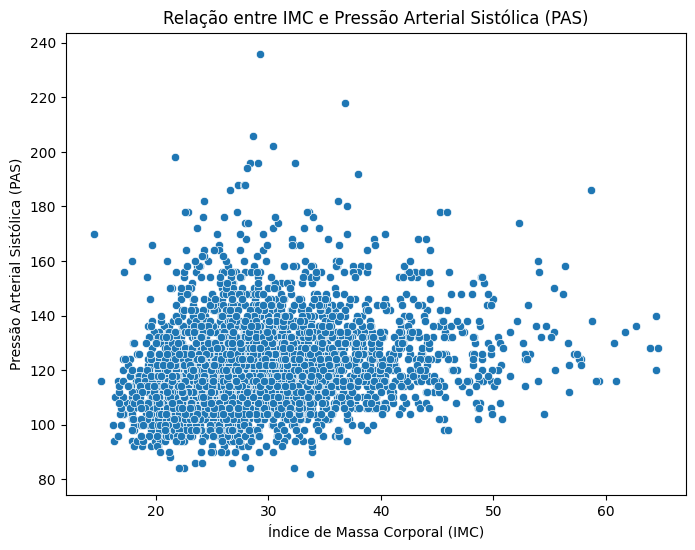

In [7]:
# Visualizar a rela√ß√£o entre IMC e PAS
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BPXSY1', data=df_filtered)
plt.title('Rela√ß√£o entre IMC e Press√£o Arterial Sist√≥lica (PAS)')
plt.xlabel('√çndice de Massa Corporal (IMC)')
plt.ylabel('Press√£o Arterial Sist√≥lica (PAS)')
plt.show()

# Definindo o modelo de regress√£o linear

In [8]:
# Definir as vari√°veis dependente (X) e independente (y)
X = df_filtered[['BMXBMI']]
y = df_filtered['BPXSY1']

In [9]:
# Criar e treinar o modelo de regress√£o linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# Fazer predi√ß√µes
y_pred = model.predict(X)

# Avaliando o ajuste do modelo

In [11]:
# Avaliar o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'Erro quadr√°tico m√©dio (MSE): {mse:.2f}')
print(f'Coeficiente da regress√£o: {coef:.2f}')
print(f'Coeficiente de determina√ß√£o (R¬≤): {r2:.2f}')


Erro quadr√°tico m√©dio (MSE): 239.35
Coeficiente da regress√£o: 0.49
Coeficiente de determina√ß√£o (R¬≤): 0.05


o valor de $ùëÖ^2$ (coeficiente de determina√ß√£o) indica a propor√ß√£o da varia√ß√£o na PAS explicada pelo IMC.

- Se o valor de $R^2$ for pr√≥ximo de 1, significa que uma grande parte da varia√ß√£o da PAS √© explicada pelo IMC, sugerindo uma forte depend√™ncia.

- Se o valor de $R^2$ for pr√≥ximo de 0, significa que o IMC explica muito pouco da varia√ß√£o da PAS, sugerindo independ√™ncia ou uma rela√ß√£o fraca.

#Interpretando o coeficiente da regress√£o

Com o coefici√™nte da regress√£o podemos interpretar que a PAS aumenta 0.45 mmHg quando o ICM aumenta $1Kg/m^2$.

## Perguntas:

1. Podemos afirmar, com base no modelo, que existe uma rela√ß√£o estatisticamente significativa entre o √çndice de Massa Corporal (IMC) e a Press√£o Arterial Sist√≥lica (PAS)?.

**Resposta:** N√£o, pois, com o modelo regress√£o linear, observamos que $R^2 = 0,05$. Ou seja, apenas 5% da varia√ß√£o da PAS √© explicada pelo IMC.

2. Refa√ßa o exerc√≠cio para IMC e o n√≠vel de glicose no sangue (LBGLU), e IMC e a circunfer√™ncia da cintura (BMXWAIST). Quais dessas medidas est√£o correlacionadas?

**Resposta:**

In [16]:
# Importando a base dos n√≠vel de glicose no sangue (LBGLU)
url_glucose = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.XPT'
glucose = pd.read_sas(url_glucose)

In [28]:
# Juntando as bases
df1 = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df1 = pd.merge(df1, glucose[['SEQN', 'LBXGLU']], on='SEQN')

In [29]:
df1.head()

SEQN  RIDAGEYR  BMXBMI  LBXGLU
0  83733.0      53.0    30.8   101.0
1  83734.0      78.0    28.8    84.0
2  83736.0      42.0    20.3    84.0
3  83737.0      72.0    28.6   107.0
4  83741.0      22.0    28.0    95.0

In [30]:
# Filtrando os dados para incluir apenas indiv√≠duos entre 20 e 60 anos
df1_filtered = df1[(df1['RIDAGEYR'] >= 20) & (df1['RIDAGEYR'] <= 60)]

In [35]:
# Remover dados faltantes
df1_filtered = df1_filtered.dropna(subset=['BMXBMI', 'LBXGLU'])

In [54]:
# Definir as vari√°veis dependente (X) e independente (y)
X1 = df1_filtered[['BMXBMI']]
y1 = df1_filtered['LBXGLU']

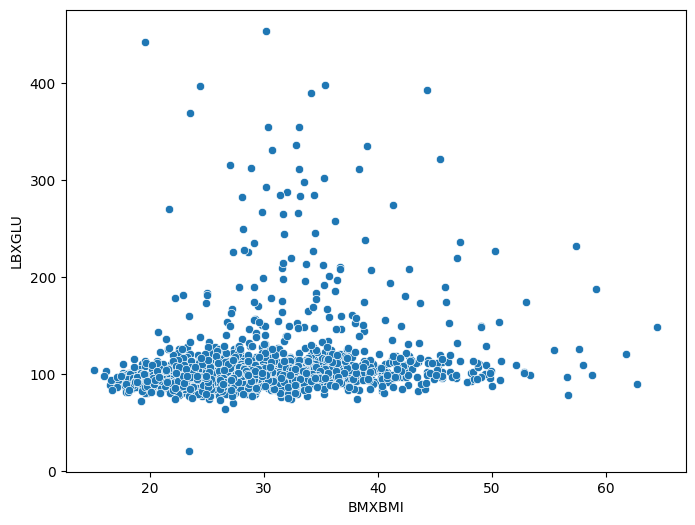

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='LBXGLU', data=df1_filtered)
plt.show()

In [56]:
# Criar e treinar o modelo de regress√£o linear
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

In [57]:
# Fazer predi√ß√µes
y1_pred = model1.predict(X1)

In [58]:
# Avaliar o modelo
mse = mean_squared_error(y1, y1_pred)
r2 = r2_score(y1, y1_pred)
coef = model1.coef_[0]

print(f'Erro quadr√°tico m√©dio (MSE): {mse:.2f}')
print(f'Coeficiente da regress√£o: {coef:.2f}')
print(f'Coeficiente de determina√ß√£o (R¬≤): {r2:.2f}')

Erro quadr√°tico m√©dio (MSE): 1390.57
Coeficiente da regress√£o: 0.97
Coeficiente de determina√ß√£o (R¬≤): 0.04


Segundo o modelo de regress√£o linear, o n√≠vel de glicose em sangue aumenta 0.97 $mg/dL$ quando o IMC aumenta $1Kg/m^2$. Por outro lado, como $R^2 = 0.04$, n√£o temos evid√™ncias de rela√ß√£o significativa entre o ICM e os n√≠veis de glicose em sangue.

# Vamos analisar a rela√ß√£o entre o IMC e a circunfer√™ncia da cintura.

In [43]:
# Selecionando as vari√°veis de interesse
base = body_measure[['BMXBMI', 'BMXWAIST']]
base = base.dropna()

In [44]:
base.head()

BMXBMI  BMXWAIST
0    27.8     101.1
1    30.8     107.9
2    28.8     116.5
3    42.4     110.1
4    20.3      80.4

In [49]:
X2 = base[['BMXBMI']]
y2 = base['BMXWAIST']

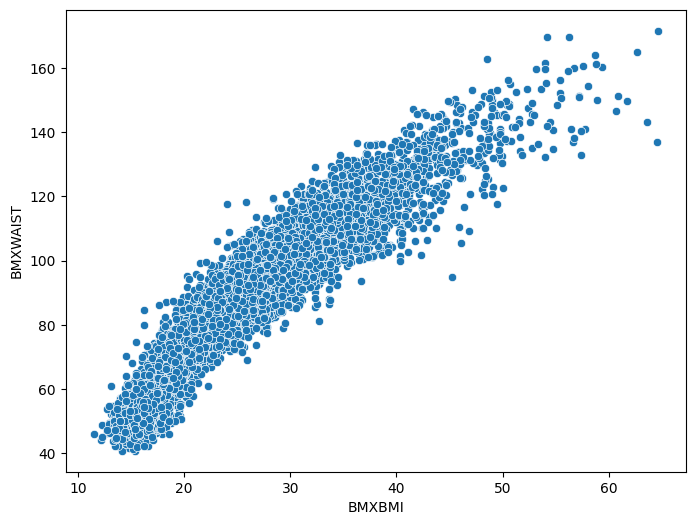

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BMXWAIST', data=base)
plt.show()

In [51]:
# Criar e treinar o modelo de regress√£o linear
model2 = LinearRegression()
model2.fit(X2, y2)

LinearRegression()

In [52]:
# Fazer predi√ß√µes
y2_pred = model2.predict(X2)

In [53]:
# Avaliar o modelo
mse = mean_squared_error(y2, y2_pred)
r2 = r2_score(y2, y2_pred)
coef = model2.coef_[0]

print(f'Erro quadr√°tico m√©dio (MSE): {mse:.2f}')
print(f'Coeficiente da regress√£o: {coef:.2f}')
print(f'Coeficiente de determina√ß√£o (R¬≤): {r2:.2f}')

Erro quadr√°tico m√©dio (MSE): 63.31
Coeficiente da regress√£o: 2.71
Coeficiente de determina√ß√£o (R¬≤): 0.88


Para este modelo temos evid√™ncia de rela√ß√£o significativa entre ICM e a Circunfer√™ncia da Cintura, pois $R^2 = 0.88$

3. Utilizando o modelo de regress√£o, qual seria o valor estimado da circunfer√™ncia da cintura para um indiv√≠duo com IMC igual a 25?

**Resposta:** Para ICM = 25Kg/$m^2$ temos que a Circunfer√™ncia da Cintura estimada √© 25$\times$2.71 = 67.65 cm.